This DataSet includes all the space missions since the beginning of Space Race (1957)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode (connected=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

**1-Getting data**

In [2]:
df=pd.read_csv('datasets_828921_1417131_Space_Corrected.csv')

In [3]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


**2- Cleaning data**

*2-1-Removing unnecessary columns*

In [4]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Detail'], axis=1,inplace=True)

*2-2-Changing columns names*

In [5]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
df.columns

Index(['company_name', 'location', 'datum', 'status_rocket', '_rocket',
       'status_mission'],
      dtype='object')

In [7]:
df.columns=['company_name', 'location', 'datum', 'status_rocket','rocket', 'status_mission']

*2-3-Removing Null Values*

In [8]:
df.isnull().sum()

company_name         0
location             0
datum                0
status_rocket        0
rocket            3360
status_mission       0
dtype: int64

In [9]:
df.drop(['rocket'], axis=1,inplace=True)

In [10]:
df.head()

,company_name,location,datum,status_rocket,status_mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,Success


*2-4-Changing datum format*

In [11]:
df['datum']=pd.to_datetime(df['datum'])

In [12]:
type(df['datum'].iloc[0])

datetime.datetime

In [13]:
df['year']=df['datum'].apply(lambda x: x.year)

*2-5-Adding the name of countries*

In [14]:
df['country']=df['location'].apply(lambda x: x.split(',')[-1])

In [15]:
df.head(2)

,company_name,location,datum,status_rocket,status_mission,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,StatusActive,Success,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,StatusActive,Success,2020,China


**3-Visualization**

*3-1- Total number of missions conducted by each company*

Text(0.5, 1.0, 'Total number of missions conducted by each company')

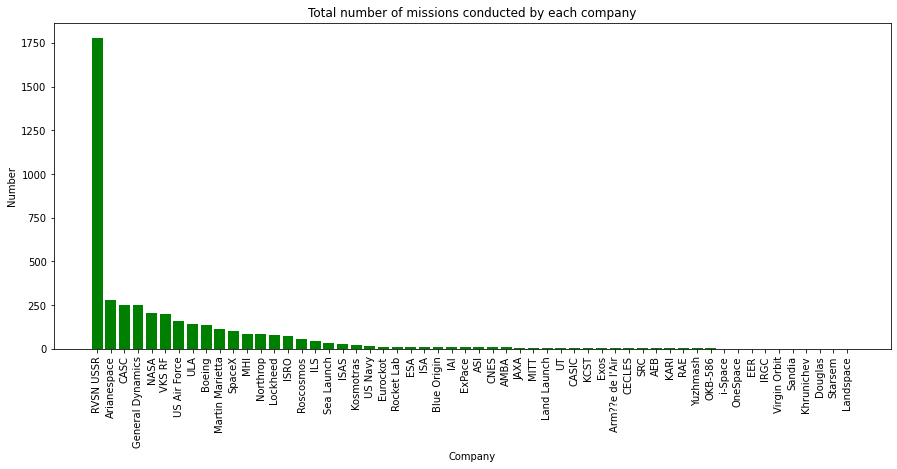

In [16]:
plt.figure(figsize=(15,6))
plt.bar(x=list(df['company_name'].value_counts().index), height=list(df['company_name'].value_counts()),color='g')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Number')
plt.title('Total number of missions conducted by each company')

*3-2- Status of missions for each company*

In [20]:
new1=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new1.append(df1[df1['status_mission']=='Success']['status_mission'].count())
print(new1)

[94, 231, 51, 139, 6, 74, 9, 9, 11, 0, 188, 80, 1, 269, 4, 12, 63, 0, 45, 1, 0, 0, 12, 6, 3, 2, 0, 21, 1, 33, 1, 9, 186, 131, 26, 2, 6, 74, 0, 1, 1614, 0, 203, 100, 2, 1, 9, 129, 6, 1, 1, 1, 2, 4, 3, 2]


In [21]:
new2=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new2.append(df1[df1['status_mission']=='Failure']['status_mission'].count())
print(new2)

[4, 14, 3, 0, 1, 7, 1, 2, 2, 1, 7, 2, 0, 7, 8, 0, 8, 1, 0, 0, 1, 1, 1, 0, 2, 3, 1, 1, 0, 3, 2, 3, 11, 3, 3, 1, 1, 5, 2, 0, 121, 1, 37, 11, 0, 0, 0, 30, 2, 3, 1, 4, 0, 3, 0, 14]


In [22]:
new3=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new3.append(df1[df1['status_mission']=='Prelaunch Failure']['status_mission'].count())
print(new3)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
new4=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new4.append(df1[df1['status_mission']=='Partial Failure']['status_mission'].count())
print(new4)

[1, 6, 1, 1, 0, 2, 0, 0, 0, 0, 6, 2, 0, 3, 0, 0, 5, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 6, 2, 1, 0, 0, 0, 0, 0, 41, 0, 11, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1]


Text(0.5, 1.0, 'Mission status for each company')

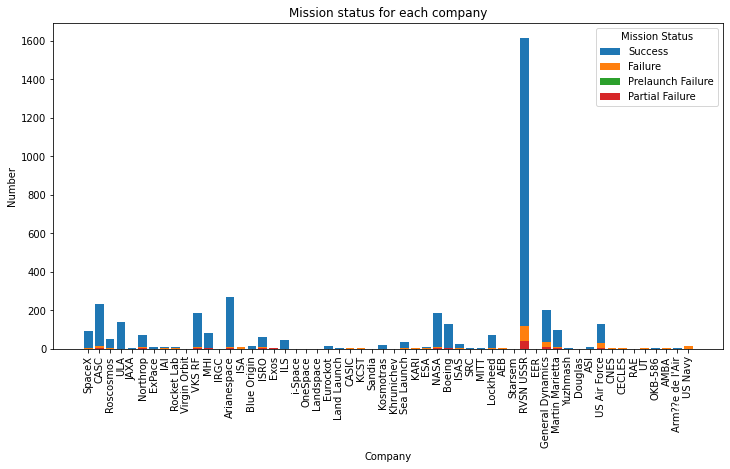

In [29]:
plt.figure(figsize=(12,6))

plt.bar(x=df['company_name'].unique(), height=new1)
plt.bar(x=df['company_name'].unique(), height=new2)
plt.bar(x=df['company_name'].unique(), height=new3)
plt.bar(x=df['company_name'].unique(), height=new4)

plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Number')
plt.legend(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'], title='Mission Status')
plt.title('Mission status for each company')

*3-3-Top 5 companies with the highest number of successful, failed, prelaunch failed, partially failed missions*

In [30]:
df_success=pd.DataFrame({'company':df['company_name'].unique(), 'successful_missions':new1})
df_success_sorted=df_success.sort_values(by='successful_missions',ascending=False).head(5)

In [31]:
df_failed=pd.DataFrame({'company':df['company_name'].unique(), 'failed_missions':new2})
df_failed_sorted=df_failed.sort_values(by='failed_missions',ascending=False).head(5)

In [32]:
df_prelaunch_failed =pd.DataFrame({'company':df['company_name'].unique(), 'prelaunch_failed _missions':new3})
df_prelaunch_failed_sorted=df_prelaunch_failed.sort_values(by='prelaunch_failed _missions',ascending=False).head(5)

In [33]:
df_partially_failed =pd.DataFrame({'company':df['company_name'].unique(), 'partially_failed _missions':new4})
df_partially_failed_sorted=df_partially_failed.sort_values(by='partially_failed _missions',ascending=False).head(5)

Text(0.5, 1.0, 'Top 5 companies with the highest number of partially failed missions')

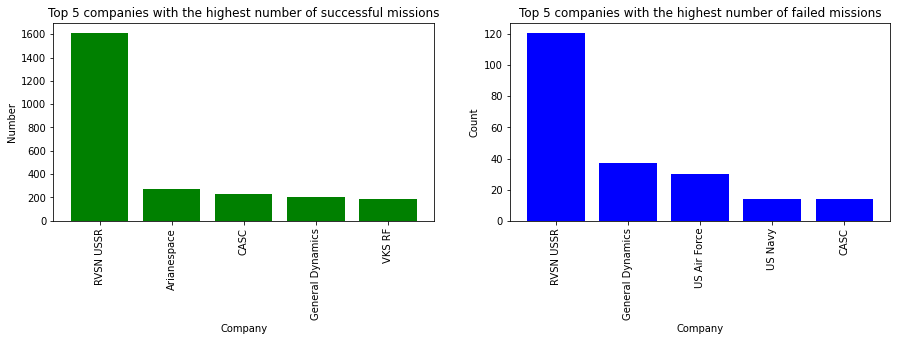

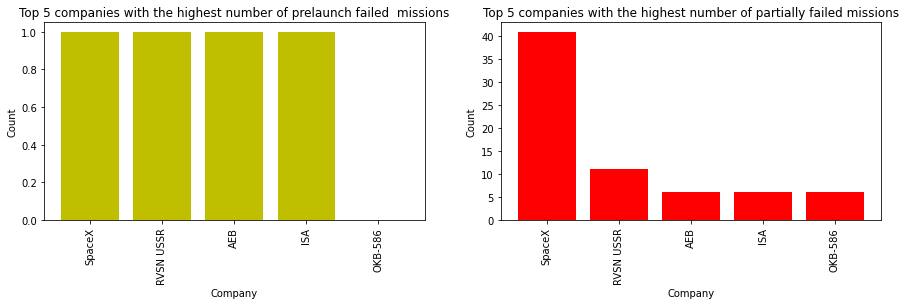

In [34]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.bar(x=df_success_sorted['company'], height=df_success_sorted['successful_missions'],color='g')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Number')
plt.title('Top 5 companies with the highest number of successful missions')

plt.subplot(2,2,2)
plt.bar(x=df_failed_sorted['company'], height=df_failed_sorted['failed_missions'],color='b')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Top 5 companies with the highest number of failed missions')

plt.figure(figsize=(15,8))

plt.subplot(2,2,3)
plt.bar(x=df_prelaunch_failed_sorted['company'], height=df_prelaunch_failed_sorted['prelaunch_failed _missions'],color='y')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Top 5 companies with the highest number of prelaunch failed  missions')

plt.subplot(2,2,4)
plt.bar(x=df_prelaunch_failed_sorted['company'], height=df_partially_failed_sorted['partially_failed _missions'],color='r')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Top 5 companies with the highest number of partially failed missions')

*3-4-Total number of active and retired rockets*

In [45]:
df['status_rocket'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [46]:
df[df['status_rocket']=='StatusActive']['status_rocket'].count()

790

In [47]:
df[df['status_rocket']=='StatusRetired']['status_rocket'].count()

3534

Text(0.5, 1.0, 'Total number of active and retired rockets')

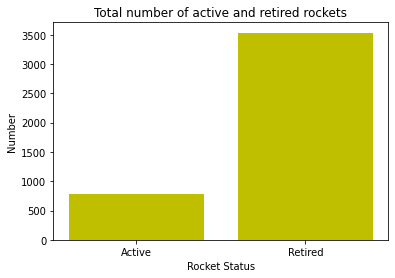

In [48]:
plt.bar(x=['Active', 'Retired'], height=[790, 3534],color='y')
plt.xlabel('Rocket Status')
plt.ylabel('Number')
plt.title('Total number of active and retired rockets')

*3-5-Number of active and retired rockets for each company*

In [37]:
new5=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new5.append(df1[df1['status_rocket']=='StatusActive']['status_rocket'].count())
print(new5)

[38, 211, 32, 87, 6, 63, 10, 5, 13, 1, 27, 32, 1, 114, 9, 12, 50, 4, 13, 1, 1, 0, 0, 7, 1, 3, 1, 0, 1, 36, 0, 1, 0, 1, 0, 0, 6, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [38]:
new6=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new6.append(df1[df1['status_rocket']=='StatusRetired']['status_rocket'].count())
print(new6)

[62, 40, 23, 53, 1, 20, 0, 6, 0, 0, 174, 52, 0, 165, 4, 0, 26, 0, 33, 0, 0, 1, 13, 0, 4, 2, 0, 22, 0, 0, 3, 12, 203, 135, 30, 3, 1, 79, 0, 1, 1777, 1, 251, 114, 2, 1, 9, 161, 8, 4, 2, 5, 2, 8, 4, 17]


Text(0.5, 1.0, 'Number of active and retired for each company')

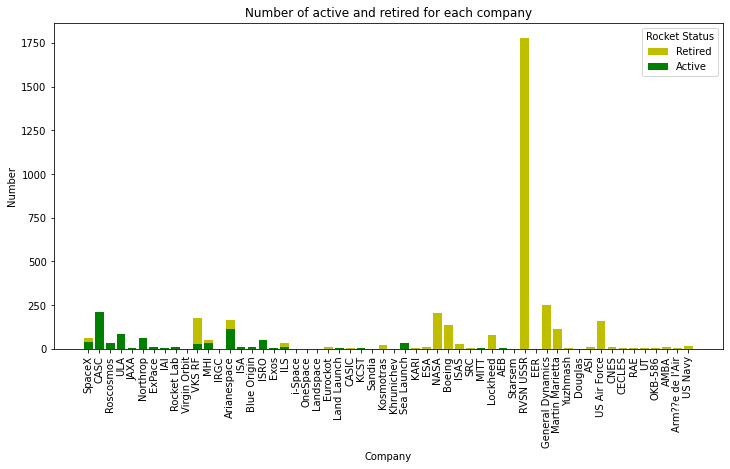

In [39]:
plt.figure(figsize=(12,6))
plt.bar(x=df['company_name'].unique(), height=new6,color='y')
plt.bar(x=df['company_name'].unique(), height=new5,color='g')

plt.xlabel('Company')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.legend(['Retired', 'Active'], title='Rocket Status')
plt.title('Number of active and retired for each company')

*3-6- Status of missions in each year*

In [40]:
new7=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new7.append(df2[df2['status_mission']=='Success']['status_mission'].count())
print(new7)

[57, 100, 113, 84, 86, 48, 51, 43, 34, 40, 34, 47, 45, 46, 46, 34, 37, 48, 47, 40, 53, 51, 61, 64, 56, 53, 58, 57, 59, 54, 76, 50, 57, 53, 56, 68, 66, 65, 62, 65, 49, 46, 94, 110, 108, 107, 90, 96, 89, 105, 93, 85, 92, 87, 81, 74, 48, 29, 65, 32, 19, 8, 6, 2]


In [41]:
new8=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new8.append(df2[df2['status_mission']=='Failure']['status_mission'].count())
print(new8)

[6, 6, 2, 6, 2, 3, 1, 2, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 2, 1, 4, 6, 5, 3, 3, 5, 4, 4, 3, 3, 3, 1, 1, 2, 4, 5, 1, 1, 3, 2, 3, 2, 1, 4, 3, 6, 7, 7, 7, 12, 10, 17, 6, 11, 10, 11, 10, 12, 15, 17, 20, 9, 20, 1]


In [42]:
new9=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new9.append(df2[df2['status_mission']=='Prelaunch Failure']['status_mission'].count())
print(new9)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [43]:
new10=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new10.append(df2[df2['status_mission']=='Partial Failure']['status_mission'].count())
print(new10)

[0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 3, 1, 3, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 4, 3, 1, 2, 0, 2, 0, 1, 0, 3, 2, 4, 1, 5, 8, 9, 2, 2, 0, 2, 3, 0, 3, 2, 0]


Text(0.5, 1.0, 'Mission status in each year')

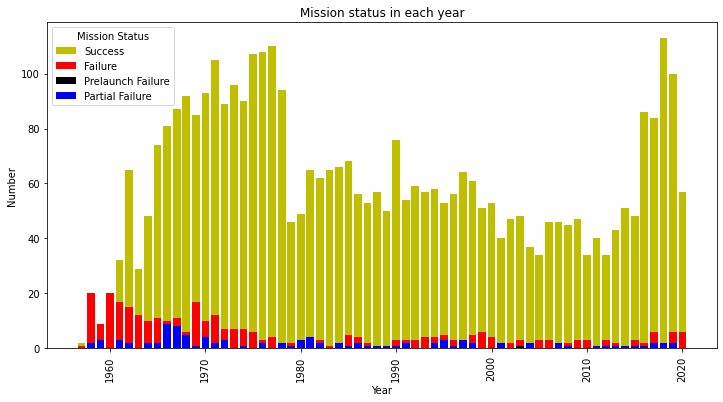

In [45]:
plt.figure(figsize=(12,6))

plt.bar(x=df['year'].unique(), height=new7,color='y')

plt.bar(x=df['year'].unique(), height=new8,color='r')

plt.bar(x=df['year'].unique(), height=new9,color='black')

plt.bar(x=df['year'].unique(), height=new10,color='b')
plt.xlabel('Year')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.legend(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'], title='Mission Status')
plt.title('Mission status in each year')

*3-7-Top 15 locations with the highest number of missions*

In [47]:
df_loc=df.groupby(by='location').count().sort_values(by='company_name', ascending=False).head(15)

Text(0.5, 1.0, 'Top 15 locations with the highest number of missions')

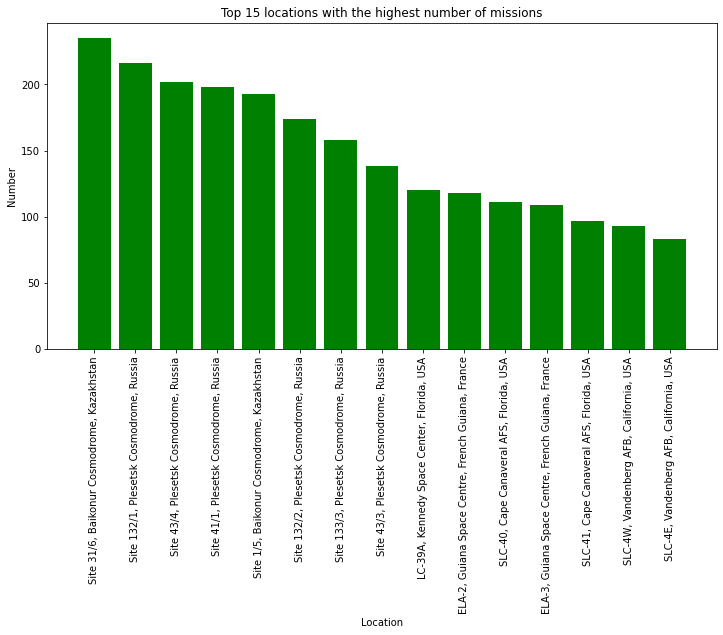

In [48]:
plt.figure(figsize=(12,6))

plt.bar(x=list(df_loc.index), height=df_loc['company_name'],color='g')
plt.xlabel('Location')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.title('Top 15 locations with the highest number of missions')

*3-8-Number of missions carried out in each country*

In [50]:
df_country=df.groupby('country').count().sort_values(by='company_name',ascending=False)

Text(0.5, 1.0, 'Number of missions carried out in each country')

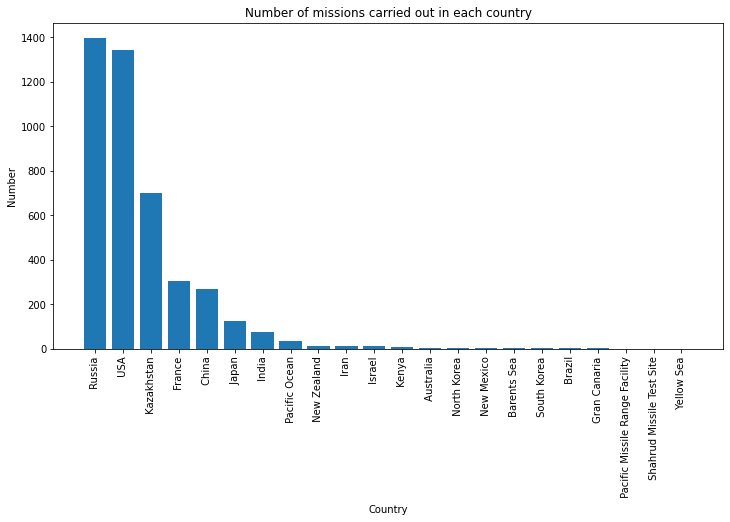

In [51]:
plt.figure(figsize=(12,6))

plt.bar(x=list(df_country.index), height=df_country['company_name'])
plt.xlabel('Country')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.title('Number of missions carried out in each country')

Russia carried out the highest number of missions and  USA was in the second place. 

In [52]:
data=dict(type='choropleth', locations=list(df_country.index), locationmode='country names', colorscale='viridis', reversescale=True, text=list(df_country.index),z=df_country['company_name'], colorbar={'title':'Number'})
layout=dict(title='Number of Space Missions in Different Countries', geo=dict(showframe=False, projection={'type': 'mercator'}))
choromap=go.Figure(data=[data], layout=layout)
iplot(choromap)

*3-9- Percentage distribution of top 10 countries involved in space missions*

In [54]:
df_country_10=df.groupby('country').count().sort_values(by='company_name',ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 countries involved in space missions')

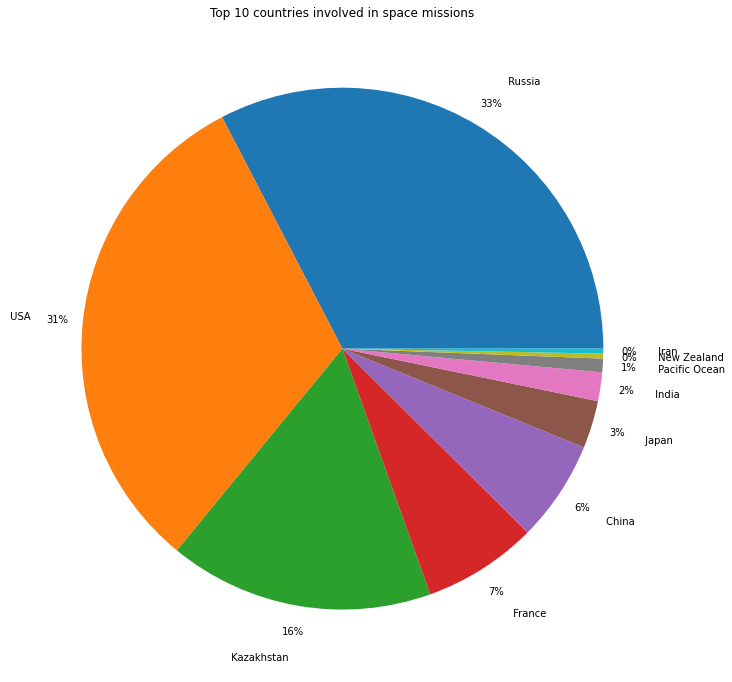

In [55]:
plt.figure(figsize=(12,12))
plt.pie(x=df_country_10['company_name'],labels=list(df_country_10.index), pctdistance=1.1, labeldistance=1.2,autopct='%1.0f%%' )
plt.title('Top 10 countries involved in space missions')

*3-10- Status of missions in each country*

In [56]:
a=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    a.append(df_count[df_count['status_mission']=='Success']['status_mission'].count())
print(a)

[1186, 243, 608, 113, 9, 11, 1303, 1, 285, 4, 63, 0, 1, 2, 0, 33, 1, 2, 0, 2, 9, 3]


In [57]:
b=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    b.append(df_count[df_count['status_mission']=='Failure']['status_mission'].count())
print(b)

[127, 19, 72, 10, 2, 2, 62, 0, 13, 8, 8, 1, 0, 3, 1, 3, 2, 1, 2, 0, 0, 3]


In [58]:
c=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    c.append(df_count[df_count['status_mission']=='Prelaunch Failure']['status_mission'].count())
print(c)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [59]:
d=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    d.append(df_count[df_count['status_mission']=='Partial Failure']['status_mission'].count())
print(d)

[30, 6, 20, 3, 0, 0, 30, 0, 5, 0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'Mission status in each country')

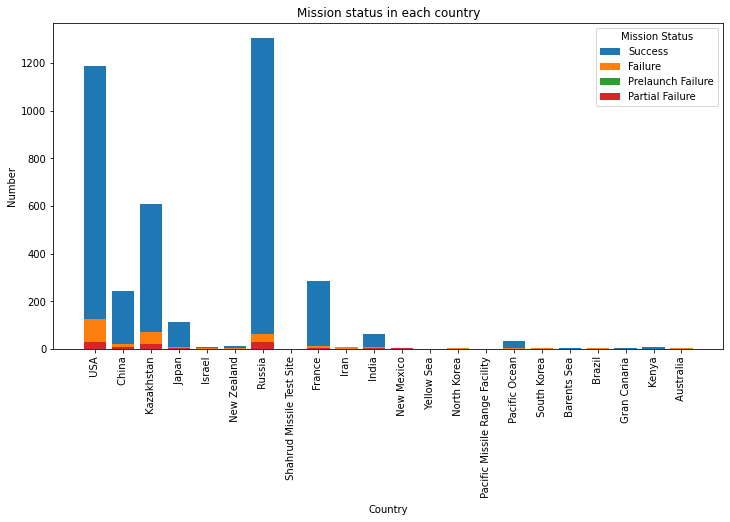

In [62]:
plt.figure(figsize=(12,6))

plt.bar(x=df['country'].unique(), height=a)
plt.bar(x=df['country'].unique(), height=b)
plt.bar(x=df['country'].unique(), height=c)
plt.bar(x=df['country'].unique(), height=d)

plt.xlabel('Country')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.legend(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'], title='Mission Status')
plt.title('Mission status in each country')

*3-11- Number of missions carried out in US states*

In [67]:
df_usa=df[df['country']== ' USA']

In [68]:
df_usa['state']=df_usa['location'].apply(lambda x: x.split(',')[-2])

C:\Users\Soha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df_usa.head(2)

,company_name,location,datum,status_rocket,status_mission,year,country,state
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,StatusActive,Success,2020,USA,Florida
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,StatusActive,Success,2020,USA,Texas


In [70]:
df_usa_sorted=df_usa.groupby('state').count().sort_values(by='company_name',ascending=False)

Text(0.5, 1.0, 'Number of missions carried out in US states')

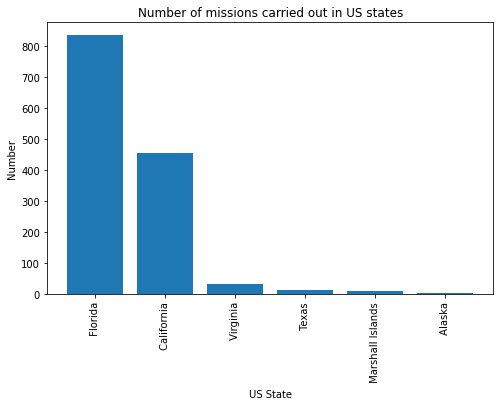

In [71]:
plt.figure(figsize=(8,5))

plt.bar(x=list(df_usa_sorted.index), height=df_usa_sorted['company_name'])
plt.xlabel('US State')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.title('Number of missions carried out in US states')

In [72]:
data=dict(type='choropleth', locations=['FL','CA','VA','TX','MH','AK'], locationmode='USA-states', colorscale='viridis', reversescale=True, text=['FL','CA','VA','TX','MH','AK'],z=df_usa_sorted['company_name'], colorbar={'title':'Number'})
layout=dict(title='Number of Space Missions in Different Countries', geo=dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)'))
choromap=go.Figure(data=[data], layout=layout)
iplot(choromap)

*3-12- Number of missions of each country in each year*

In [73]:
m=[]
for x in df['country'].unique():
    n=[]
    df_c=df[df['country']== x]
    for y in df['year'].unique():
        df_y=df_c[df_c['year']==y]
        n.append(df_y.count()['year'])
    m.append(n)
print(m)

[[21, 24, 33, 30, 27, 21, 23, 19, 13, 18, 15, 25, 15, 19, 18, 12, 16, 23, 17, 22, 28, 31, 36, 36, 33, 30, 26, 24, 27, 18, 26, 16, 7, 6, 6, 16, 17, 13, 11, 13, 11, 9, 21, 14, 13, 15, 10, 17, 17, 16, 11, 17, 22, 26, 47, 33, 24, 17, 60, 43, 30, 16, 23, 1], [22, 33, 39, 18, 22, 2, 1, 2, 1, 2, 0, 0, 9, 10, 6, 5, 8, 7, 5, 1, 4, 4, 6, 6, 4, 3, 5, 1, 4, 1, 5, 0, 4, 2, 2, 1, 3, 1, 1, 1, 0, 1, 2, 1, 3, 3, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 13, 9, 13, 11, 1, 1, 3, 0, 4, 5, 4, 2, 3, 2, 1, 3, 2, 1, 2, 3, 3, 3, 3, 2, 4, 6, 6, 3, 4, 7, 4, 9, 12, 7, 12, 4, 6, 10, 10, 6, 3, 9, 25, 29, 23, 23, 17, 22, 31, 29, 38, 40, 38, 36, 43, 28, 16, 14, 7, 9, 4, 5, 2], [3, 2, 6, 7, 4, 4, 4, 3, 2, 4, 1, 3, 1, 2, 6, 2, 0, 3, 3, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 5, 2, 2, 3, 2, 2, 3, 3, 1, 3, 2, 1, 3, 2, 2, 2, 1, 0, 1, 3, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [74]:
pivot=pd.DataFrame(data=m, columns=df['year'].unique(), index=df['country'].unique())

In [81]:
pivot.head(2)

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1966,1965,1964,1963,1962,1961,1960,1959,1958,1957
USA,21,24,33,30,27,21,23,19,13,18,...,47,33,24,17,60,43,30,16,23,1
China,22,33,39,18,22,2,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

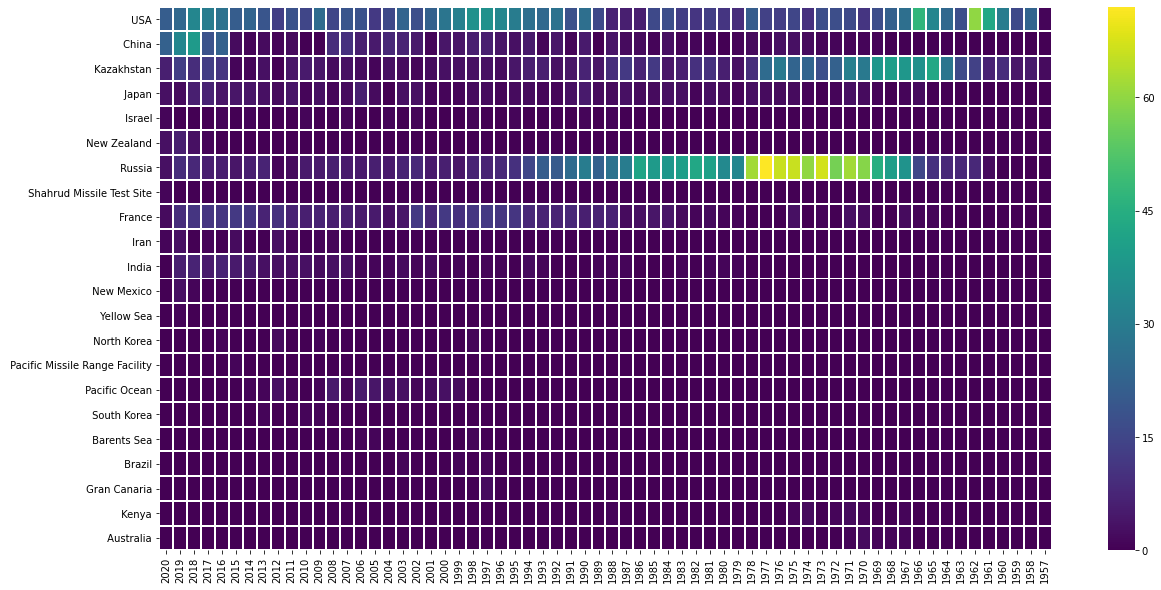

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot,cmap='viridis',linecolor='white', linewidth= 1)

**4-Prediction**

*4-1- Encoding Data*

*4-1-1- Company*

In [85]:
model1=LabelEncoder()

In [86]:
model1.fit(df['company_name'])

LabelEncoder()

In [87]:
df['company_name']=model1.transform(df['company_name'])

*4-1-2- Status Rocket*

In [89]:
model2=LabelEncoder()

In [90]:
model2.fit(df['status_rocket'])

LabelEncoder()

In [91]:
df['status_rocket']=model2.transform(df['status_rocket'])

*4-1-3- Country*

In [92]:
model3=LabelEncoder()

In [93]:
model3.fit(df['country'])

LabelEncoder()

In [95]:
df['country']=model3.transform(df['country'])

In [96]:
df.head(2)

,company_name,location,datum,status_rocket,status_mission,year,country
0,46,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,0,Success,2020,20
1,7,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,0,Success,2020,3


*4-2- Logistic Regression*

In [97]:
X=df[['company_name', 'status_rocket', 'year', 'country']]
y= df['status_mission']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [99]:
lr=LogisticRegression()

In [100]:
lr.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
prediction_lr=lr.predict(X_test)

In [102]:
print(confusion_matrix(y_test,prediction_lr))
print('\n')
print(classification_report(y_test,prediction_lr))

[[   0    0    0   91]
 [   0    0    0   28]
 [   0    0    0    4]
 [   0    0    0 1175]]


                   precision    recall  f1-score   support

          Failure       0.00      0.00      0.00        91
  Partial Failure       0.00      0.00      0.00        28
Prelaunch Failure       0.00      0.00      0.00         4
          Success       0.91      1.00      0.95      1175

         accuracy                           0.91      1298
        macro avg       0.23      0.25      0.24      1298
     weighted avg       0.82      0.91      0.86      1298



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



This model is pretty bad because of zero values

*4-3- Decision Tree*

In [125]:
dt=DecisionTreeClassifier()

In [126]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
prediction_dt=dt.predict(X_test)

In [128]:
print(confusion_matrix(y_test,prediction_dt))
print('\n')
print(classification_report(y_test,prediction_dt))

[[  16    1    0   74]
 [   2    1    0   25]
 [   2    0    0    2]
 [  37   10    0 1128]]


                   precision    recall  f1-score   support

          Failure       0.28      0.18      0.22        91
  Partial Failure       0.08      0.04      0.05        28
Prelaunch Failure       0.00      0.00      0.00         4
          Success       0.92      0.96      0.94      1175

         accuracy                           0.88      1298
        macro avg       0.32      0.29      0.30      1298
     weighted avg       0.85      0.88      0.87      1298



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



*4-4- Random Forest*

In [129]:
rf=RandomForestClassifier(n_estimators=200)

In [130]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
prediction_rf=rf.predict(X_test)

In [132]:
print(confusion_matrix(y_test,prediction_rf))
print('\n')
print(classification_report(y_test,prediction_rf))

[[  14    1    0   76]
 [   2    1    0   25]
 [   2    0    0    2]
 [  20    5    0 1150]]


                   precision    recall  f1-score   support

          Failure       0.37      0.15      0.22        91
  Partial Failure       0.14      0.04      0.06        28
Prelaunch Failure       0.00      0.00      0.00         4
          Success       0.92      0.98      0.95      1175

         accuracy                           0.90      1298
        macro avg       0.36      0.29      0.31      1298
     weighted avg       0.86      0.90      0.87      1298



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



*4-5- SVC*

In [111]:
svc=SVC()

In [112]:
svc.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [113]:
prediction_svc=svc.predict(X_test)

In [114]:
print(confusion_matrix(y_test,prediction_svc))
print('\n')
print(classification_report(y_test,prediction_svc))

[[   7    0    0   84]
 [   2    1    0   25]
 [   1    0    0    3]
 [   8    0    0 1167]]


                   precision    recall  f1-score   support

          Failure       0.39      0.08      0.13        91
  Partial Failure       1.00      0.04      0.07        28
Prelaunch Failure       0.00      0.00      0.00         4
          Success       0.91      0.99      0.95      1175

         accuracy                           0.91      1298
        macro avg       0.58      0.28      0.29      1298
     weighted avg       0.87      0.91      0.87      1298



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



*4-5-1- SVC-GridSearch*

In [115]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
grid=GridSearchCV(SVC(),param_grid, verbose=3 )

In [118]:
grid.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.893, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.893, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.895, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.893, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.893, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.895, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.893, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.893, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.895, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.893, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.891, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.899, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.884, total=   2.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.874, total=   0.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.886, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.892, total=   7.6s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.886, total=   4.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   49.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [119]:
prediction_grid=grid.predict(X_test)

In [120]:
print(confusion_matrix(y_test,prediction_grid))
print('\n')
print(classification_report(y_test,prediction_grid))

[[   6    0    0   85]
 [   1    0    0   27]
 [   1    0    0    3]
 [   9    0    0 1166]]


                   precision    recall  f1-score   support

          Failure       0.35      0.07      0.11        91
  Partial Failure       0.00      0.00      0.00        28
Prelaunch Failure       0.00      0.00      0.00         4
          Success       0.91      0.99      0.95      1175

         accuracy                           0.90      1298
        macro avg       0.32      0.26      0.27      1298
     weighted avg       0.85      0.90      0.87      1298



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



So we conclude that Random Forest is the best model for predicting the status of the mission